In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [3]:
# Step 1: Load dataset
df = pd.read_csv(r"Dataset_ML/car_evaluation.csv")

In [4]:
# view dimensions of dataset
df.shape


(1727, 7)

In [5]:
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df.columns = columns

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
#heck the frequency counts of categorical variables.
for col in columns:
  print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [8]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [9]:
X = df.drop(['class'], axis=1)
y = df['class']

In [10]:
y


0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object

In [11]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape


((1157, 6), (570, 6))

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

In [14]:
# check data types in X_train
X_train.dtypes


buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [15]:
#Check Categorical variables
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [17]:
# Step 2: Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le


In [18]:
# Features (X) and Target (y)
X = df.drop("class", axis=1)
y = df["class"]

In [19]:
X


,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [20]:
# Step 3: Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Step 4: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Step 5: Predictions
y_pred = rf.predict(X_test)

In [23]:
# Step 6: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9624277456647399

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



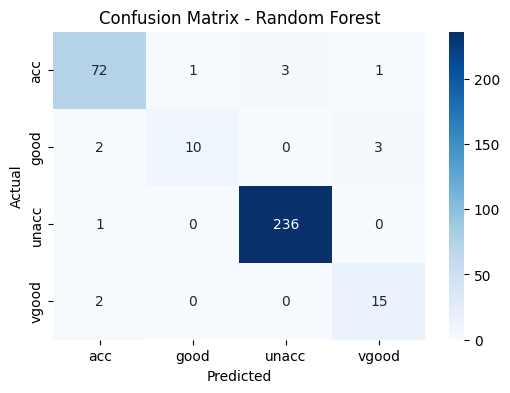

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
      xticklabels=label_encoders["class"].classes_,
      yticklabels=label_encoders["class"].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

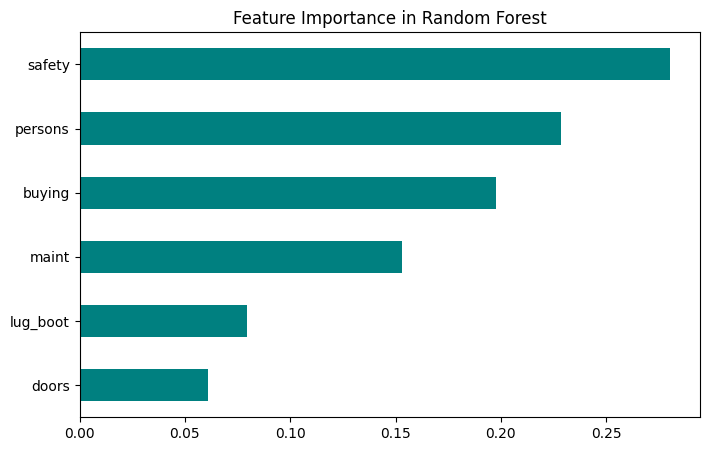

In [26]:
# Step 7: Feature Importance
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8, 5), color="teal")
plt.title("Feature Importance in Random Forest")
plt.show()

In [27]:
# view the feature scores
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.280329
persons     0.228555
buying      0.197642
maint       0.153121
lug_boot    0.079368
doors       0.060984
dtype: float64

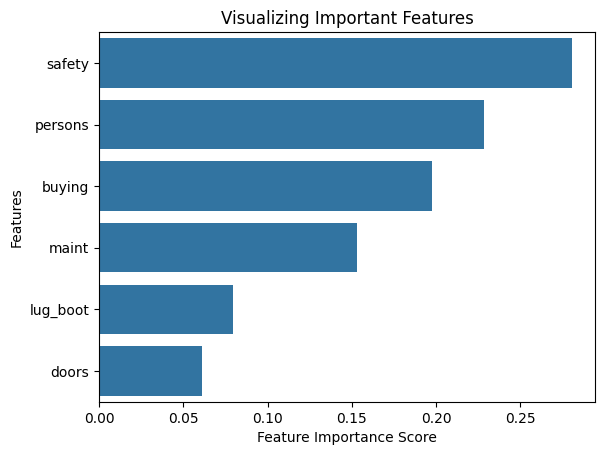

In [28]:
#Now,Visualize the feature scores with matplotlib and seaborn.
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
plt.show()

<Axes: >

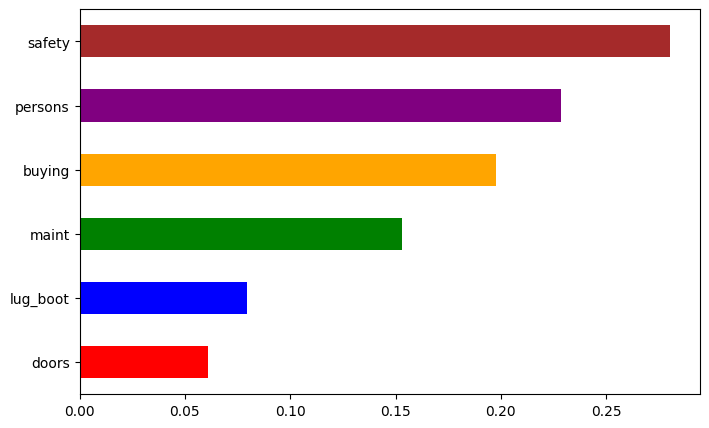

In [29]:
#Manually Define Colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown'] # one for each feature
feat_importances.sort_values().plot(kind='barh', figsize=(8, 5), color=colors)


<Axes: >

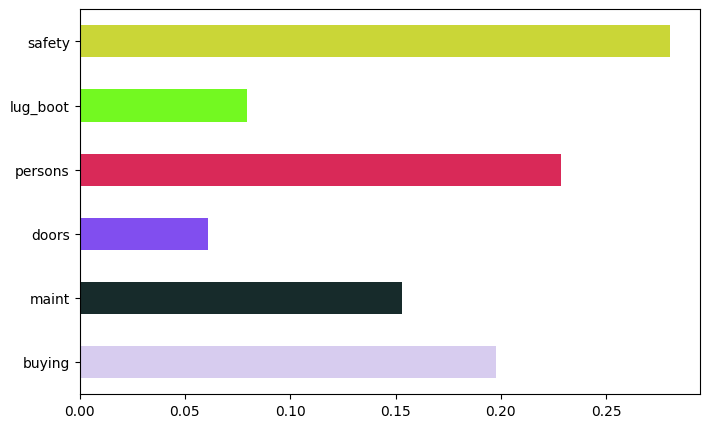

In [30]:
#Random Colors for Each Bar
colors = np.random.rand(len(feat_importances), 3) # random RGB colors
import numpy as np
feat_importances.plot(kind='barh', figsize=(8, 5), color=colors)
